In [1]:
import pandas as pd

In [35]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [36]:
col=[0,1,5,6,7,9,10]
df.drop(df.columns[col],axis=1,inplace=True)

In [37]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [43]:
input=df.drop(["Survived"],axis =1)
input.head()


,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [45]:
target=df["Survived"]
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [47]:
input.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
input["le_sex"]=le.fit_transform(input["Sex"])

In [51]:
input.head()

,Pclass,Sex,Age,Fare,le_sex
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [57]:
input=input.drop(["Sex"],axis=1)
input.head()

,Pclass,Age,Fare,le_sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [62]:
## removing all none values
input=input.replace(
    to_replace=None, 
    value=0, 
    inplace=False, 
    limit=None, 
    regex=False, 
    method='pad')

In [46]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [63]:
model.fit(input,target)

DecisionTreeClassifier()

In [64]:
model.score(input,target)

0.9831649831649831

In [65]:
input.head()

,Pclass,Age,Fare,le_sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [67]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [66]:
model.predict([[1,35.0,53.10,0]])

C:\Users\Janak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [69]:
prediction=model.predict(input)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(target,prediction)
cm

array([[549,   0],
       [ 15, 327]], dtype=int64)

Text(95.72222222222221, 0.5, 'target')

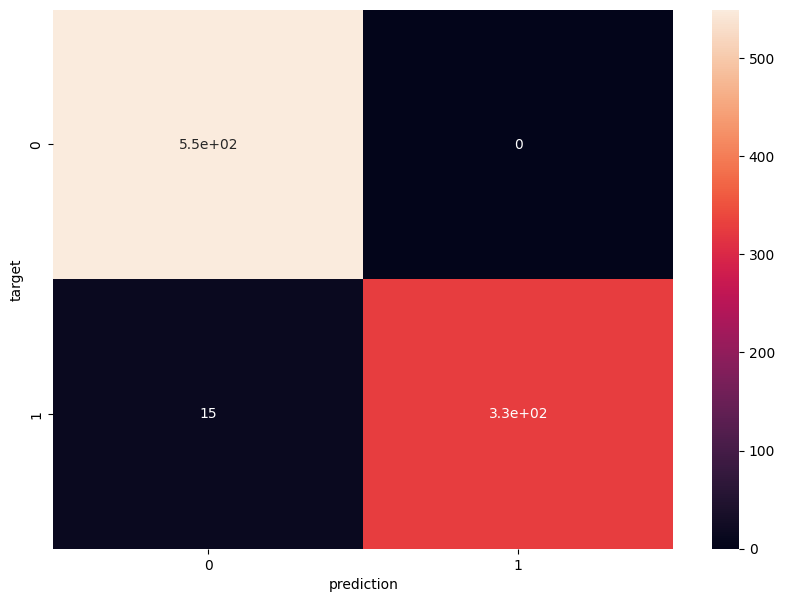

In [70]:
from matplotlib import pyplot as plt
import seaborn  as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("target")